# Import Datasets
[Click here](https://archive.ics.uci.edu/dataset/186/wine+quality) for more information about the dataset.

In [1]:
import pandas as pd

In [2]:
delimiter = ";"
white_wine_df = pd.read_csv("datasets/winequality-white.csv", sep = delimiter)
red_wine_df = pd.read_csv("datasets/winequality-red.csv", sep = delimiter)

In [3]:
def add_color_column(df, color: str) -> None:
    df["wine_color"] = color

def replace_spaces_with_underscores(df) -> None:
    df.columns = [label.replace(" ", "_") for label in df.columns]

In [4]:
replace_spaces_with_underscores(white_wine_df)
replace_spaces_with_underscores(red_wine_df)
add_color_column(white_wine_df, "white")
add_color_column(red_wine_df, "red")

In [5]:
white_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         4898 non-null   float64
 1   volatile_acidity      4898 non-null   float64
 2   citric_acid           4898 non-null   float64
 3   residual_sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free_sulfur_dioxide   4898 non-null   float64
 6   total_sulfur_dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  wine_color            4898 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 497.6+ KB


In [6]:
red_wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  wine_color            1599 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 162.5+ KB


In [7]:
df = pd.concat([white_wine_df, red_wine_df], ignore_index = True)

# Observed Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_color            6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [9]:
df.sample(5)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_color
1490,5.6,0.185,0.49,1.1,0.030,28.0,117.0,0.99180,3.55,0.45,10.3,6,white
2797,6.8,0.350,0.53,10.1,0.053,37.0,151.0,0.99630,3.07,0.40,9.4,5,white
3646,7.2,0.330,0.22,4.5,0.031,10.0,73.0,0.99076,2.97,0.52,12.2,7,white
1253,7.3,0.250,0.41,1.8,0.037,52.0,165.0,0.99110,3.29,0.39,12.2,7,white
924,7.9,0.280,0.41,2.0,0.044,50.0,152.0,0.99340,3.45,0.49,10.7,8,white


In [10]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_color              0
dtype: int64

In [11]:
df["quality"] = pd.Categorical(df["quality"], ordered = True)

In [12]:
numeric_features = df.select_dtypes(include = ["number"]).columns
categorical_features = df.select_dtypes(include = ["object", "category"]).columns

In [13]:
df[numeric_features].describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


# EDA and Visualization

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
df[numeric_features].skew()

fixed_acidity           1.723290
volatile_acidity        1.495097
citric_acid             0.471731
residual_sugar          1.435404
chlorides               5.399828
free_sulfur_dioxide     1.220066
total_sulfur_dioxide   -0.001177
density                 0.503602
pH                      0.386839
sulphates               1.797270
alcohol                 0.565718
dtype: float64

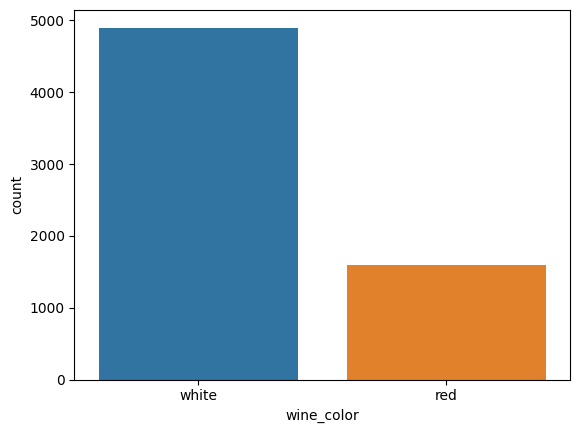

In [16]:
sns.countplot(data = df, x = "wine_color")
plt.show()

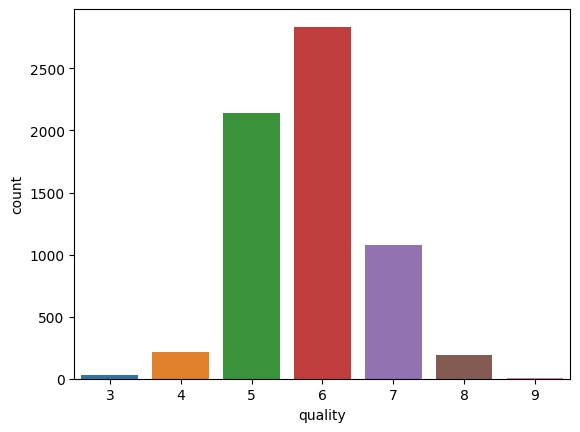

In [17]:
sns.countplot(data = df, x = "quality")
plt.show()

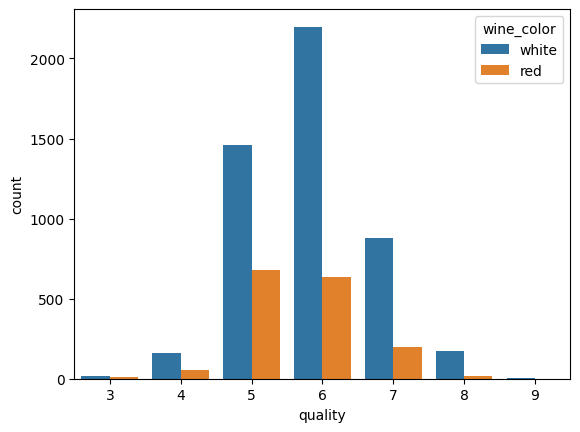

In [18]:
sns.countplot(data = df, x = "quality", hue = "wine_color")
plt.show()

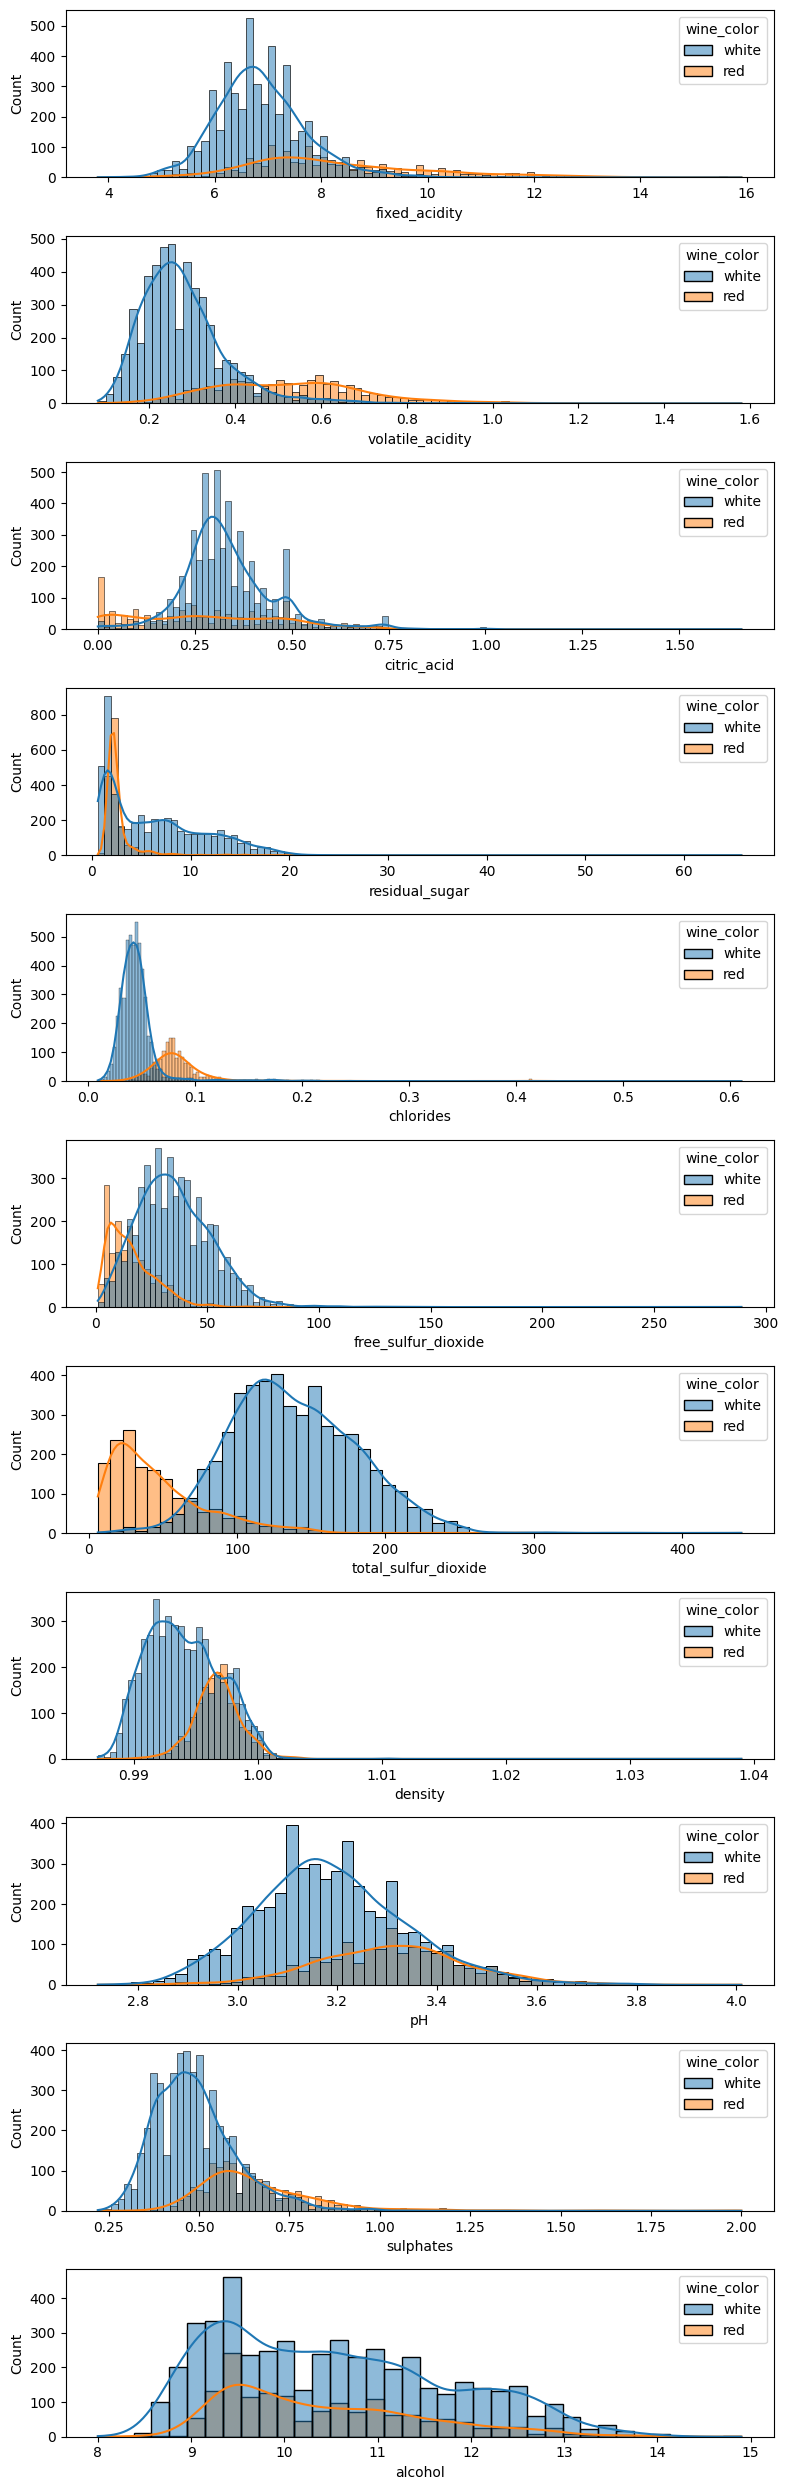

In [19]:
fig, axs = plt.subplots(nrows = numeric_features.size, figsize = (8, 25))
for i, feature in enumerate(numeric_features):
    sns.histplot(data = df, x = feature, kde = True, hue = "wine_color", ax = axs[i])
plt.tight_layout()
plt.show()

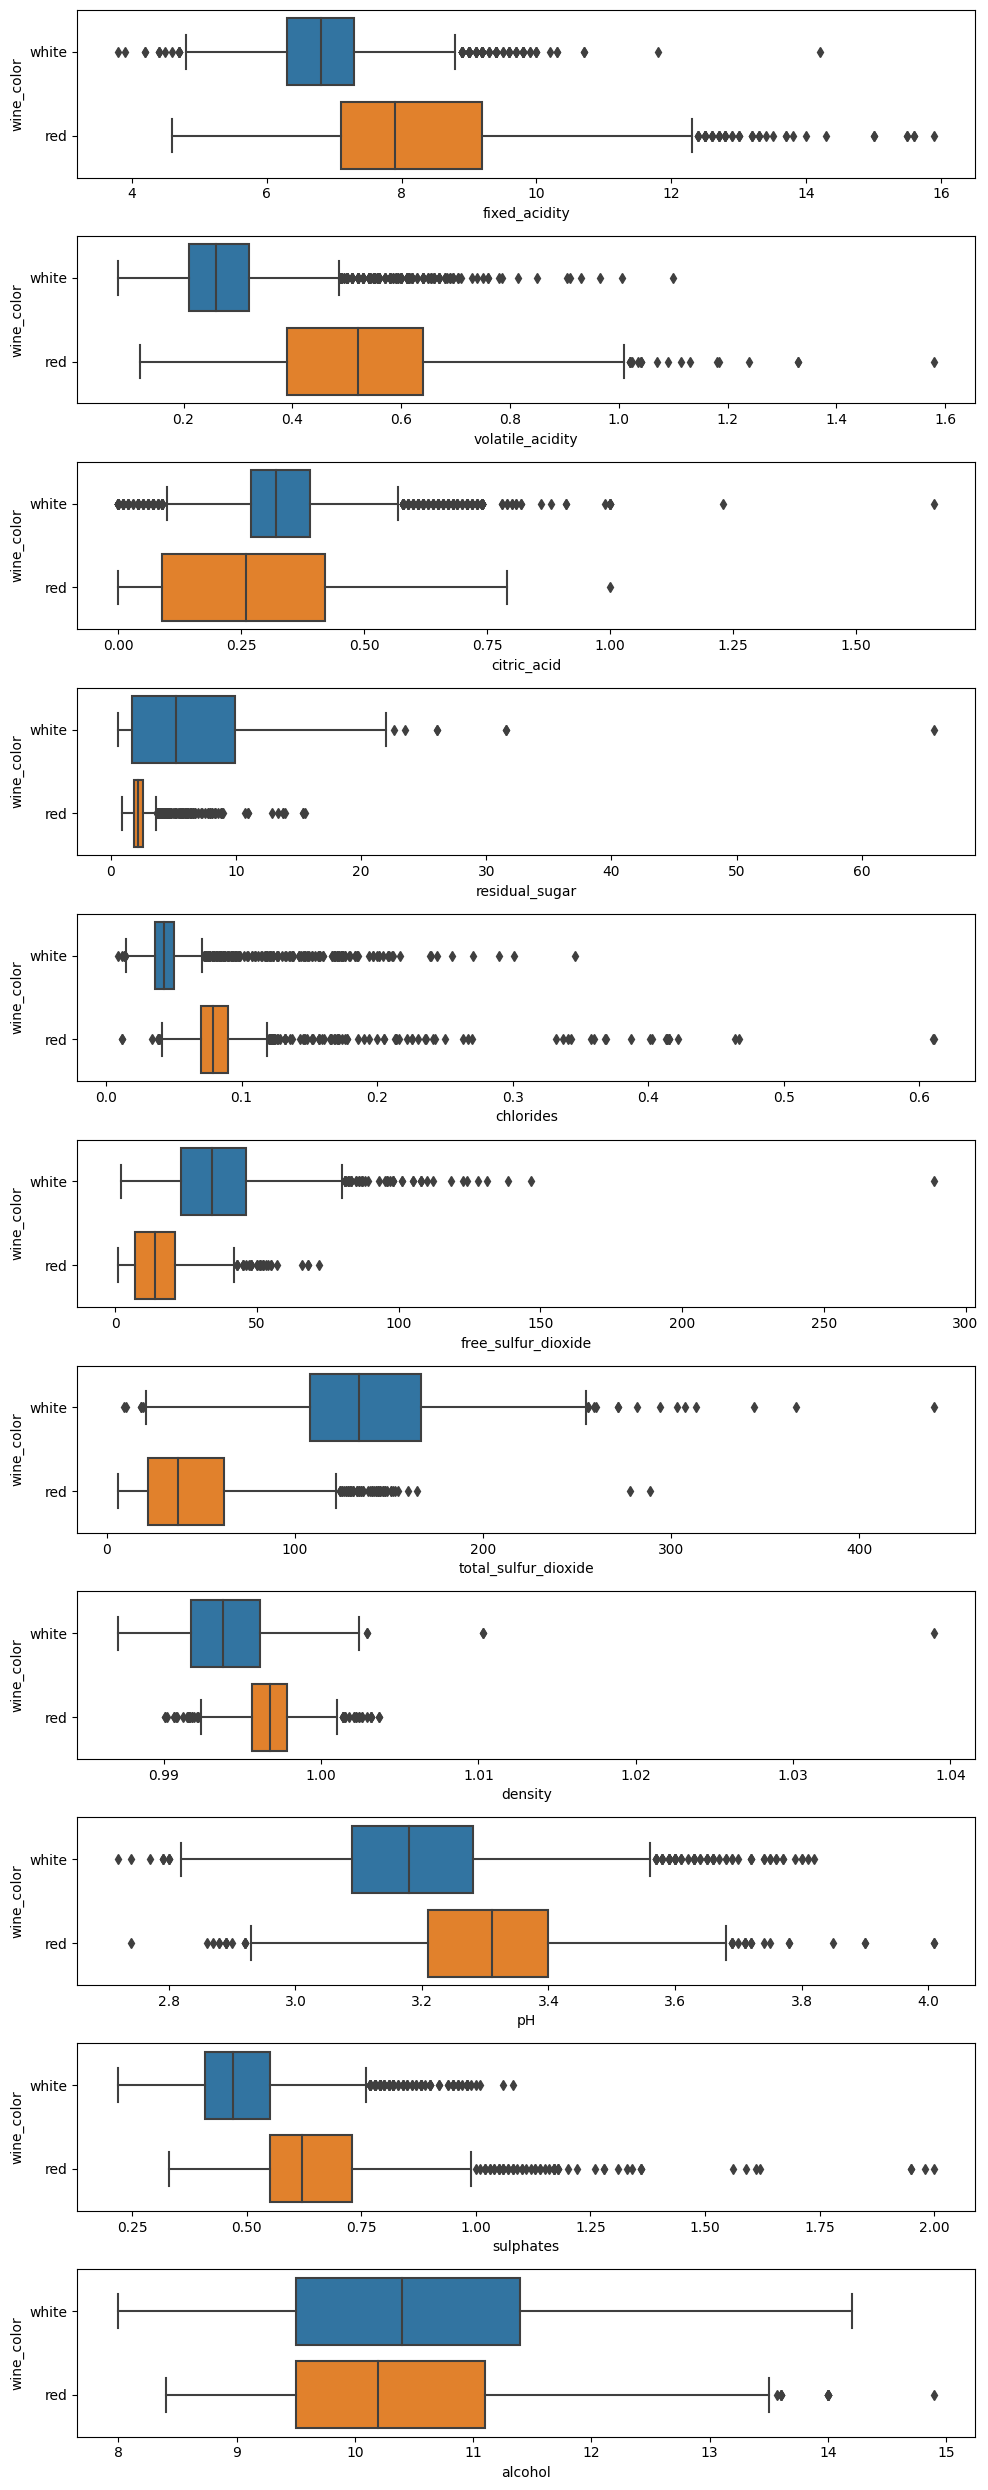

In [20]:
fig, axs = plt.subplots(nrows = numeric_features.size, figsize = (10, 25))
for i, feature in enumerate(numeric_features):
    sns.boxplot(data = df, x = feature, y = "wine_color", ax = axs[i])
plt.tight_layout()
plt.show()

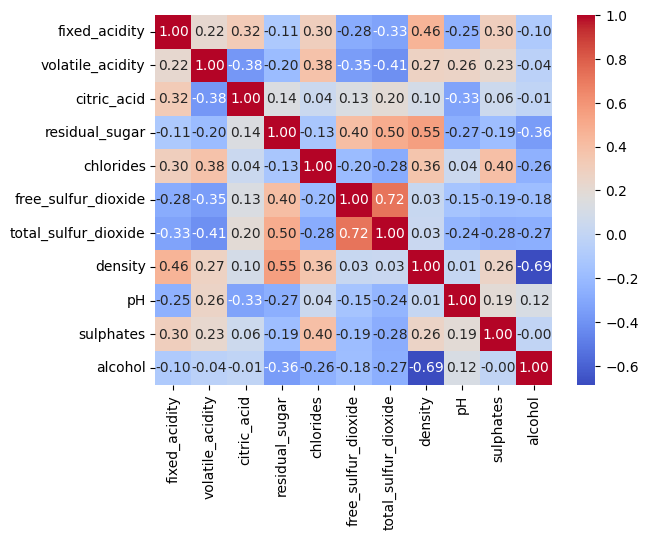

In [21]:
sns.heatmap(df[numeric_features].corr(), annot = True, fmt = ".2f", cmap = "coolwarm")
plt.show()

# Data Preprocessing

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

import numpy as np

In [23]:
drop_cols = ["wine_color"]
X = df.drop(drop_cols, axis = 1)
X["quality"] = X["quality"].cat.codes
y = df["wine_color"]

In [24]:
numeric_pipeline = Pipeline(
    steps = [
        ("log_transformer", FunctionTransformer(func = np.log1p)),
        ("scaler", StandardScaler()),
        ("pca", PCA(n_components = 2, random_state = 0))
    ]
)
ct = ColumnTransformer(
    transformers = [
        ("numeric", numeric_pipeline, numeric_features)
    ],
    remainder = "drop"
)
X = ct.fit_transform(X)
X.shape

(6497, 2)

# Model Training

## K-Means Clustering

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import normalized_mutual_info_score

In [26]:
range_n_clusters = range(2, 11)

In [27]:
def plot_scores(scores: list, score_type: str) -> None:
    plt.plot(range_n_clusters, scores, marker = "o")
    plt.xlabel("Number of clusters")
    plt.ylabel(score_type)
    plt.grid(True)
    plt.show()
    
def optimal_n_clusters(k: int):
    kmeans = KMeans(n_clusters = k, random_state = 0, n_init = 10)
    predicted_labels = kmeans.fit_predict(X)
    return predicted_labels, kmeans

### Inertia

In [28]:
inertia_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0, n_init = 10)
    kmeans.fit(X)
    inertia_scores.append(kmeans.inertia_)
    diff_score = inertia_scores[-1] - inertia_scores[-2] if len(inertia_scores) > 1 else 0
    print(f"KMeans with {n_clusters} clusters: inertia = {kmeans.inertia_:.2f} (diff = {diff_score:.2f})")

KMeans with 2 clusters: inertia = 19822.14 (diff = 0.00)
KMeans with 3 clusters: inertia = 10763.78 (diff = -9058.35)
KMeans with 4 clusters: inertia = 8857.71 (diff = -1906.07)


KMeans with 5 clusters: inertia = 7093.30 (diff = -1764.41)
KMeans with 6 clusters: inertia = 6153.37 (diff = -939.93)
KMeans with 7 clusters: inertia = 5414.47 (diff = -738.90)
KMeans with 8 clusters: inertia = 4868.07 (diff = -546.40)
KMeans with 9 clusters: inertia = 4364.99 (diff = -503.08)
KMeans with 10 clusters: inertia = 3969.13 (diff = -395.86)


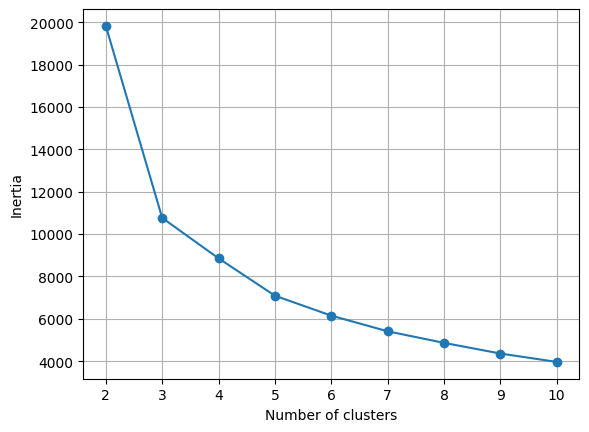

In [29]:
plot_scores(inertia_scores, "Inertia")

#### Optimal K

In [30]:
elbow_point = 3
inertia_labels, inertia_kmeans = optimal_n_clusters(k = elbow_point)

#### Model Visualization

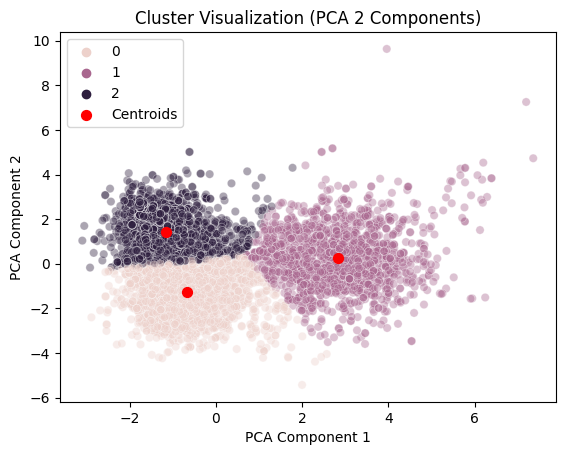

In [31]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = inertia_labels, alpha = 0.4)
plt.scatter(inertia_kmeans.cluster_centers_[:, 0], inertia_kmeans.cluster_centers_[:, 1], s = 50, c = "red", label = "Centroids")
plt.title(f"Cluster Visualization (PCA {X.shape[1]} Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### Silhouette Score

In [32]:
silhouette_scores = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters = n_clusters, random_state = 0, n_init = 10)
    pred_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, pred_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"KMeans with {n_clusters} clusters: silhouette score = {silhouette_avg:.2f}")

KMeans with 2 clusters: silhouette score = 0.49
KMeans with 3 clusters: silhouette score = 0.48
KMeans with 4 clusters: silhouette score = 0.40
KMeans with 5 clusters: silhouette score = 0.38
KMeans with 6 clusters: silhouette score = 0.38
KMeans with 7 clusters: silhouette score = 0.34
KMeans with 8 clusters: silhouette score = 0.35
KMeans with 9 clusters: silhouette score = 0.35
KMeans with 10 clusters: silhouette score = 0.35


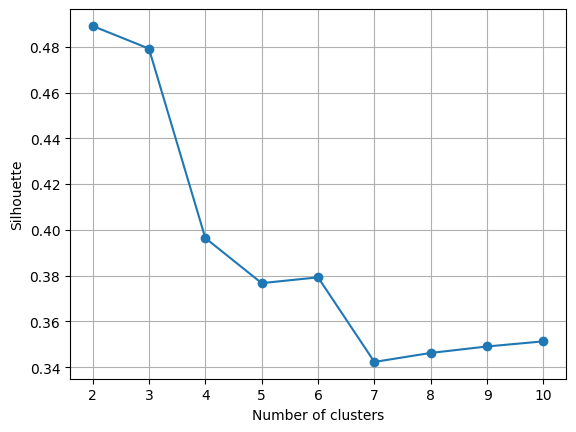

In [33]:
plot_scores(silhouette_scores, "Silhouette")

#### Optimal K

In [34]:
silhouette_labels, sc_kmeans = optimal_n_clusters(k = 2)

In [35]:
pd.crosstab(y, silhouette_labels)

col_0,0,1
wine_color,,
red,53,1546
white,4824,74


#### Model Evaluation

In [36]:
def print_scores(y_true, y_pred) -> pd.DataFrame:
    ari_score = adjusted_rand_score(y_true, y_pred)
    nmi_score = normalized_mutual_info_score(y_true, y_pred)

    metrics_df = pd.DataFrame({
        "Metric": ["Adjusted Rand Index (ARI)", "Normalized Mutual Information (NMI)"],
        "Score": [ari_score, nmi_score]
    })

    return metrics_df

In [37]:
print_scores(y, silhouette_labels)

,Metric,Score
0,Adjusted Rand Index (ARI),0.918019
1,Normalized Mutual Information (NMI),0.833745


#### Model Visualization

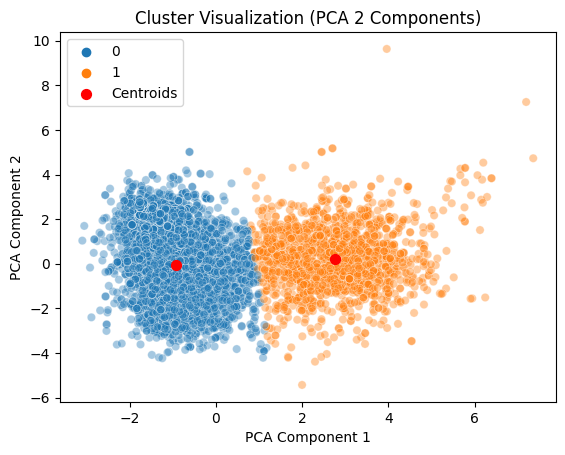

In [38]:
sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = silhouette_labels, alpha = 0.4)
plt.scatter(sc_kmeans.cluster_centers_[:, 0], sc_kmeans.cluster_centers_[:, 1], s = 50, c = "red", label = "Centroids")
plt.title(f"Cluster Visualization (PCA {X.shape[1]} Components)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

### Metric Conclusion
จากการหา optimal K โดยใช้ inertia และ silhouette score พบว่า
- หากอิงจาก silhouette score ค่า K ที่เหมาะสมที่สุดคือ 2 (silhouette score) ซึ่งวิธีนี้ result ออกมาคือ 2 clusters ที่มันเป็นการแบ่งแยกประเภทของ wine color และได้ค่า ARI ที่ ~ 0.92 และ NMI ที่ ~ 0.83 เมื่อเทียบกับ true labels ที่เป็น wine color จริง ๆ
- หากใช้ elbow point ค่า K ที่เหมาะสมที่สุดคือ 3 (inertia) ซึ่งได้ cluster ใหม่และน่าสนใจ เลยจะเลือกใช้ metric นี้ในการทำวิเคราะห์ต่อไป

## Hierarchical Clustering

In [39]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from typing import Tuple

In [40]:
def plot_dendrogram(X, method: str, metric: str):
    linkage_matrix = linkage(X, method, metric)
    dendrogram(linkage_matrix, truncate_mode = "lastp", p = 10, leaf_font_size = 5, show_contracted = True)
    plt.show()
    c, coph_dists = cophenet(linkage_matrix, pdist(X))
    print(f"Cophenetic correlation coefficient: {c:.2f}")
    return linkage_matrix

def get_cluster_numbers(threshold: float, linkage_matrix) -> Tuple[int, list]:
    predicted_labels = fcluster(linkage_matrix, threshold, criterion = "distance")
    return len(set(predicted_labels)), predicted_labels

def plot_clusters(X, predicted_labels, linkage_type: str):
    sns.set(style = "whitegrid")
    sns.scatterplot(x = X[:, 0], y = X[:, 1], hue = predicted_labels, alpha = 0.4)
    plt.title(f"Cluster Results ({linkage_type})")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.legend()
    plt.show()

### Complete Linkage

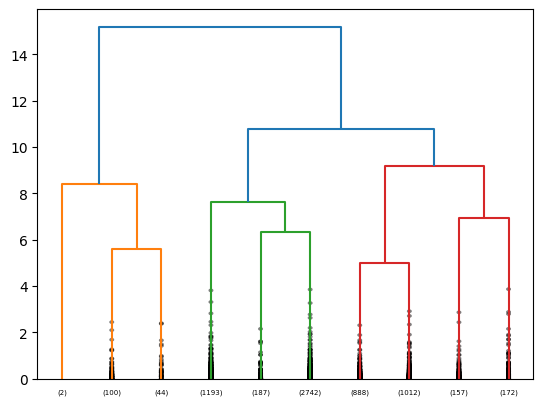

Cophenetic correlation coefficient: 0.59


In [41]:
complete_linkage = plot_dendrogram(X, method = "complete", metric = "euclidean")

In [42]:
cluster_numbers, complete_predicted_labels = get_cluster_numbers(10, complete_linkage)
print(f"Number of clusters: {cluster_numbers}")

Number of clusters: 3


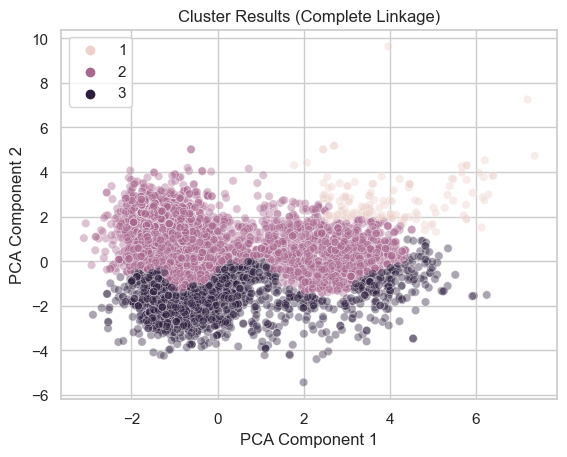

In [43]:
plot_clusters(X, complete_predicted_labels, "Complete Linkage")

### Average Linkage

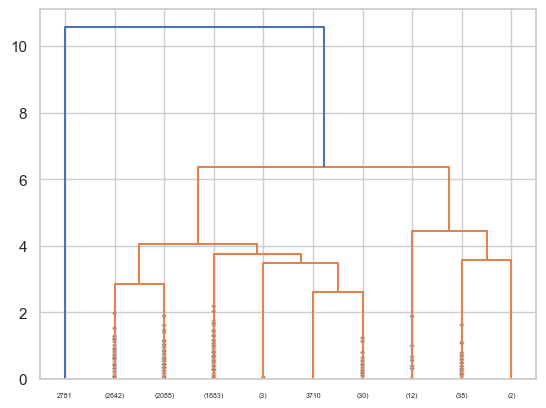

Cophenetic correlation coefficient: 0.74


In [44]:
avg_linkage = plot_dendrogram(X, method = "average", metric = "euclidean")

In [45]:
cluster_numbers, avg_predicted_labels = get_cluster_numbers(6, avg_linkage)
print(f"Number of clusters: {cluster_numbers}")

Number of clusters: 3


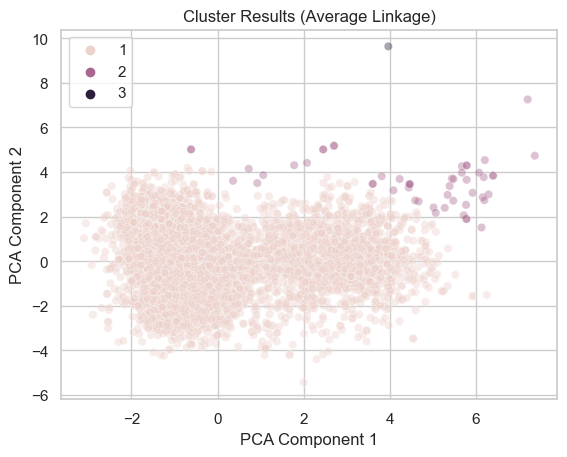

In [46]:
plot_clusters(X, avg_predicted_labels, "Average Linkage")

### Single Linkage

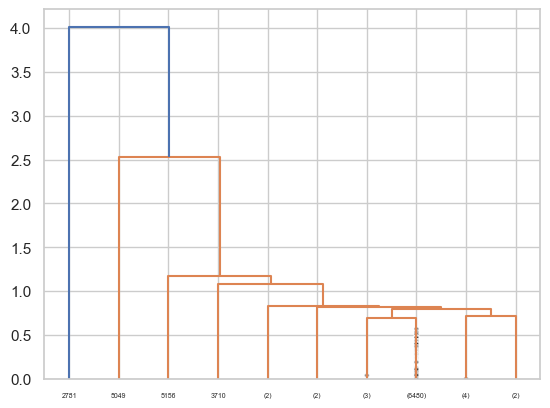

Cophenetic correlation coefficient: 0.45


In [47]:
single_linkage = plot_dendrogram(X, method = "single", metric = "euclidean")

In [48]:
cluster_numbers, single_predicted_labels = get_cluster_numbers(2, single_linkage)
print(f"Number of clusters: {cluster_numbers}")

Number of clusters: 3


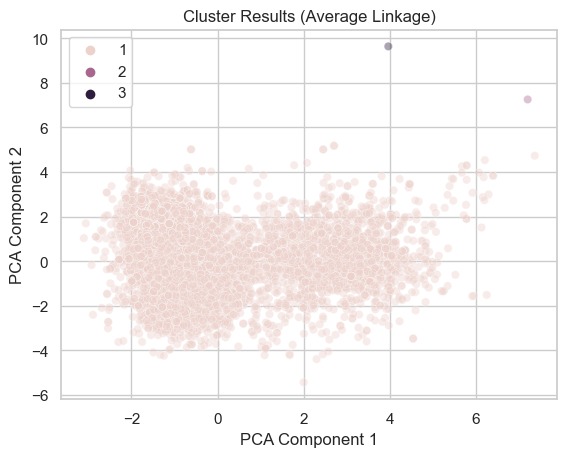

In [49]:
plot_clusters(X, single_predicted_labels, "Average Linkage")

### Ward Linkage

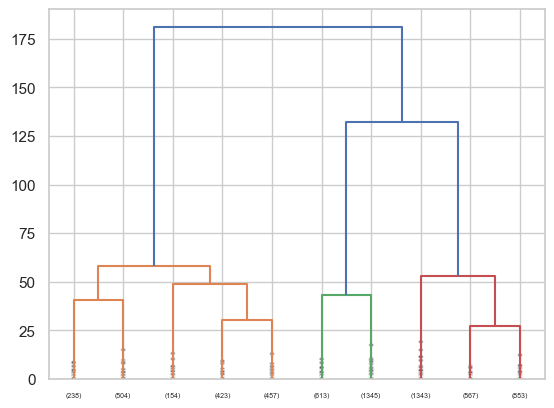

Cophenetic correlation coefficient: 0.70


In [50]:
ward_linkage = plot_dendrogram(X, method = "ward", metric = "euclidean")

In [51]:
cluster_numbers, ward_predicted_labels = get_cluster_numbers(100, ward_linkage)
print(f"Number of clusters: {cluster_numbers}")

Number of clusters: 3


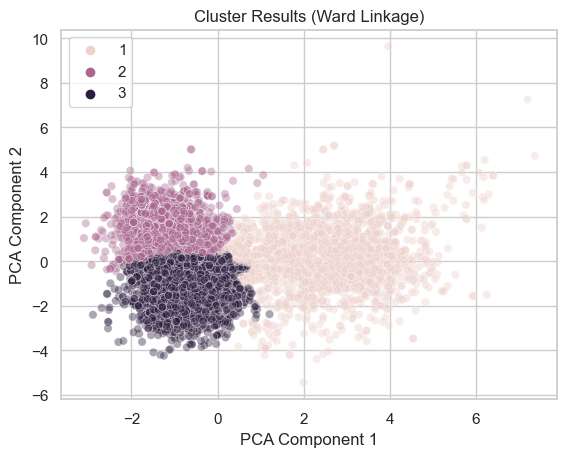

In [52]:
plot_clusters(X, ward_predicted_labels, "Ward Linkage")

### Method Conclusion
หลังจากที่ทำการทดลองโดยใช้หลาย ๆ method ในการทำ hierarchical clustering แล้ว เมื่อดูจากกราฟ dendrogram และเทียบกับ method อื่น ๆ จะพบว่า ward method นั้นให้ผลลัพธ์ clutering เป็นที่น่าพอใจ เหมือนกันกับ single method แต่ หากเปรียบเทียบกันด้วย cluster result นั้น พบว่า ward method นั้นให้ผลลัพธ์ cluster ที่ดีกว่า single method และ method อื่น ๆ นอกจากนี้ยังมีความคล้ายกับ inertia

## Model Comparison and Conclusion
จากการเปรียบเทียบระหว่าง K-Means Clustering และ Hierarchical Clustering พบว่า K-Means ต้องหา K ที่เหมาะสมในการทำ clustering แต่ Hierarchical Clustering ไม่จำเป็นต้องหา K แต่จะต้องระบุ method ที่เหมาะสมในการทำ clustering และกำหนด threshold เพื่อระบุว่าจะเอากี่ cluster และถ้าพูดถึงในเรื่องของประสิทธิภาพ จะพบว่า K-Means นั้นจะเหมาะแก่ large dataset มากกว่า Hierarchical Clustering เพราะว่า Hierarchical Clustering นั้นเปรียบเทียบทุก data points ทุกคู่ ทำให้เกิดปัญหาในเรื่องของการคำนวน ซึ่ง Hierarchical Clustering นั้นเหมาะสำหรับการทำ explore data ใน small dataset เพื่อดูความสัมพันธ์ของ data points และเพื่อให้เห็นภาพรวมของข้อมูลที่มีอยู่ใน dataset นั้น ๆ

# Clusters Analyzing
variable ที่น่าสนใจใน dataset นี้ก็คือค่า alcohol ของ wine

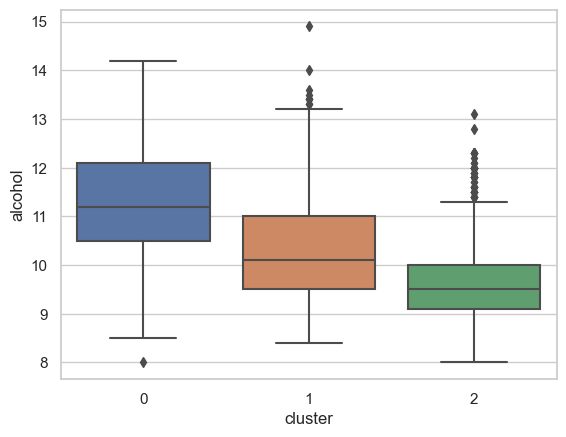

In [53]:
df["cluster"] = inertia_labels
sns.boxplot(data = df, x = "cluster", y = "alcohol")
plt.show()